In [2]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_score, silhouette_samples
#import matplotlib.ticker as ticker
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm
import itertools
import networkx as nx
import plotly.figure_factory as ff
from itertools import combinations
from IPython.display import display
from pacmap import PaCMAP
from scipy.cluster.hierarchy import linkage, fcluster

In [32]:
pipeline= "CaVEMan"

In [33]:
cancer_type = "Brain"
non_coding_region = 'donor'
file_name = "df_log_odd_score_{}.tsv".format(pipeline)

In [34]:
file_path= '/home/pdutta/Data/Cancer_wiseGDC/New_data/{}/Generated_files/Variant_Analysis/{}/{}'.format(cancer_type, non_coding_region, file_name)
output_path = "/home/pdutta/Data/Cancer_wiseGDC/New_data/{}/Generated_files/Kmeans_cluster/{}/Categorise_{}/".format(cancer_type, non_coding_region, pipeline)
# Subfolders within the base path

In [35]:
df = pd.read_csv(file_path, sep='\t', index_col=0)
df = df.set_index('Patient_ID', drop=True)
df

,chr1_1387737_1387816_1387762_1387765_CCT_C,chr1_3836455_3836534_3836467_3836468_G_GT,chr1_15524029_15524108_15524057_15524058_C_CGGGGGCG,chr1_16052373_16052452_16052445_16052450_GTCAC_TCAT,chr1_35079404_35079483_35079420_35079421_G_GGC,chr1_55056151_55056230_55056225_55056233_GGGGCGGA_G,chr1_59762631_59762710_59762637_59762638_T_TTC,chr1_63014040_63014119_63014041_63014042_G_GCTA,chr1_93846925_93847004_93846925_93846926_T_TC,chr1_100729344_100729423_100729408_100729409_G_GT,...,chr11_104606983_104607062_104607015_104607021_GCCTAA_G,chr19_32040532_32040611_32040534_32040535_A_AC,chr22_20983084_20983163_20983088_20983093_GGTGA_G,chr22_23583769_23583848_23583797_23583803_GCTCCT_G,chrX_120143862_120143941_120143876_120143877_G_GA,chr11_64653656_64653735_64653695_64653696_T_G,chr16_55733472_55733551_55733540_55733541_A_T,chr18_46483547_46483626_46483557_46483558_A_G,chr3_49422321_49422400_49422337_49422338_A_C,chr4_70681561_70681640_70681600_70681601_T_C
Patient_ID,,,,,,,,,,,,,,,,,,,,,
3adc47fa-b27a-4df1-98ab-201ebab3c6bf_CaVEMan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67c83385-8497-4c2d-932e-9a3b9bb90ec9_CaVEMan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c6b9e176-a36b-4eb2-aa15-6a0155c1aeb5_CaVEMan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d214490c-9f1c-4228-8cbc-7c8238942041_CaVEMan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4e285b95-27ba-49b9-980a-6dbfc09a62c0_CaVEMan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b0a32ca7-5793-4f50-97f8-8adf5254a205_CaVEMan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7bed15a4-3b1e-487e-954d-e6b55e296dc0_CaVEMan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0218338-6d83-491f-b51d-844d209f54b3_CaVEMan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


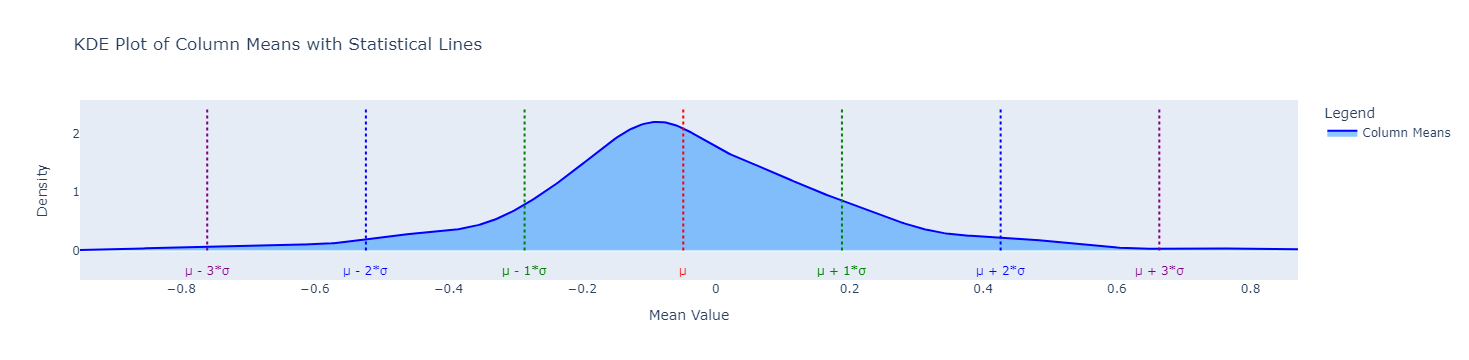

In [36]:
# Assuming 'df' is your DataFrame
# Calculate the mean for each numeric column, ignoring NaN values
means = df.select_dtypes(include=[np.number]).mean()

# Compute overall mean and standard deviation of these means
overall_mean = means.mean()
overall_std = means.std()

# Create a simple KDE plot using Plotly's Figure Factory
fig = ff.create_distplot([means.dropna()], ['Column Means'], show_hist=False, show_rug=False)

# Add vertical lines for mean and mean ± standard deviations
lines = [overall_mean, overall_mean - overall_std, overall_mean + overall_std,
         overall_mean - 2 * overall_std, overall_mean + 2 * overall_std,
         overall_mean - 3 * overall_std, overall_mean + 3 * overall_std]
colors = ['red', 'green', 'green', 'blue', 'blue', 'purple', 'purple']
names = ['μ', 'μ - 1*σ', 'μ + 1*σ', 'μ - 2*σ', 'μ + 2*σ', 'μ - 3*σ', 'μ + 3*σ']
line_style = dict(dash='dot', width=2)

# Update density plot to have a filled color with transparency
fig.data[0].update(
    marker=dict(color='blue', line=dict(width=0)),
    fill='tozeroy',
    fillcolor='rgba(30,144,255,0.5)'
)

# Max density for y-scale of lines
max_density = fig.data[0].y.max() * 1.1  # Scale it a bit for visual clarity

# Add dotted vertical lines and x-axis annotations for the statistical measures
for line, color, name in zip(lines, colors, names):
    fig.add_trace(go.Scatter(
        x=[line, line],
        y=[0, max_density],  # Extend from 0 to max density for visibility
        mode='lines',
        line=dict(color=color, **line_style),
        name=name
    ))

    # Add annotations directly on the x-axis for each line
    fig.add_annotation(
        x=line, y=0,
        text=name,
        showarrow=False,
        yshift=-20,
        xshift=-5 if 'Mean' in name else 0,
        font=dict(color=color)
    )

# Remove legend for vertical lines
fig.for_each_trace(
    lambda trace: trace.update(showlegend=False) if trace.name in names else (),
)

# Update layout for better visualization
fig.update_layout(
    title='KDE Plot of Column Means with Statistical Lines',
    xaxis_title='Mean Value',
    yaxis_title='Density',
    legend_title='Legend',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Show the plot
fig.show()

In [37]:
# Define a function to categorize based on the overall mean and standard deviation
def categorize_value(x, overall_mean, overall_std):
    if x == 0:
        return 0
    elif x > overall_mean + overall_std:
        return 1
    elif x < overall_mean - overall_std:
        return -1
    else:
        return 0

In [38]:
# Custom function to calculate Mean Absolute Deviation
def calculate_mad(column):
    mean = column.mean()
    return (column - mean).abs().mean()

In [39]:
def silhouette_plot(k, cluster_labels, silhouette_avg, sample_silhouette_values, folder_path, top_n_percent):
    fig = go.Figure()
    y_lower = 10  # Initial lower margin for the silhouette plot
    cluster_info = []  # To store info about clusters for the legend

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cluster_info.append(f"Cluster {i} [{size_cluster_i} patients]")  # Append cluster info for legend

        fig.add_trace(go.Scatter(
            x=ith_cluster_silhouette_values,
            y=np.arange(y_lower, y_upper),
            mode='lines',
            line=dict(width=0.5),
            fill='tozerox',
            name=f'Cluster {i} [{size_cluster_i} patients]'
        ))

        y_lower = y_upper + 10  # Gap between silhouettes

    # Red dashed line for average silhouette score
    fig.add_trace(go.Scatter(
        x=[silhouette_avg, silhouette_avg],
        y=[0, y_lower],
        mode='lines',
        line=dict(color="red", dash='dash', width=2),
        name='Average silhouette score'
    ))

    # Update plot layout
    fig.update_layout(
        title=f'Silhouette Analysis for k={k} Clusters for top {top_n_percent}% features <br>Average silhouette score {silhouette_avg:.4f}',
        xaxis_title='Silhouette Coefficient Values',
        yaxis_title='Cluster Label',
        yaxis=dict(range=[-0.1, y_lower + 10], showticklabels=False),
        showlegend=True
    )

    # Save and display the figure
    fig.write_html(f"{folder_path}/silhouette_plot_k_{k}_top_feature_{top_n_percent}.html")
    #fig.show()

In [40]:
def kmeans_silhouette_score(scaled_data, n_clusters, result_path, original_indices, top_percentage):
    # Initialize and run KMeans clustering with varying number of clusters
    #display(scaled_data)
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, tol=1e-04, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    # Calculate and return the silhouette score
    score = silhouette_score(scaled_data, labels)
    sample_silhouette_values = silhouette_samples(scaled_data, labels)
    silhouette_plot(k,labels, score, sample_silhouette_values, result_path, top_percentage)
    

    # Create text files for each cluster
    for i in range(n_clusters):
        cluster_file_path = f"{result_path}/cluster_{i}.txt"
        with open(cluster_file_path, 'w') as file:
            indices = original_indices[labels == i]
            for idx in indices:
                file.write(str(idx) + '\n')
    return score

In [41]:
def data_categorized_mad(data):
    # Assuming 'df' is your DataFrame
    # Calculate the mean for each numeric column, ignoring NaN values
    means = data.select_dtypes(include=[np.number]).mean()
    
    # Compute overall mean and standard deviation of these means
    overall_mean = means.mean()
    overall_std = means.std()
    
    # Replace NaN values with 0
    data.fillna(0, inplace=True)
    
    # Apply the categorization function to each element of the dataframe
    for col in data.select_dtypes(include=[np.number]).columns:
        data[col] = data[col].apply(lambda x: categorize_value(x, overall_mean, overall_std))
    #display(data)
    # Calculate MAD for each numeric column
    mad_values = {col: calculate_mad(data[col]) for col in data.select_dtypes(include=[np.number]).columns}

    # Sort columns by MAD in descending order
    mad_sorted = sorted(mad_values.items(), key=lambda x: x[1], reverse=True)
    return (data, mad_values, mad_sorted)

In [42]:
data_processed, mad_values, mad_sorted = data_categorized_mad(df)

In [43]:
print("Columns ranked by MAD (in descending order):")
for col, mad in mad_sorted[0:10]:
    print(f"{col}: {mad}")

Columns ranked by MAD (in descending order):
chr9_62804102_62804181_62804157_62804158_T_C: 0.45610425240054875
chr1_16577277_16577356_16577307_16577308_T_C: 0.252400548696845
chr9_62804102_62804181_62804146_62804147_A_G: 0.23246742112482852
chr1_229432516_229432595_229432516_229432517_C_G: 0.16045096021947872
chr1_6148814_6148893_6148818_6148819_C_G: 0.1527777777777778
chr7_154060937_154061016_154060955_154060956_G_C: 0.15277777777777773
chr3_48656100_48656179_48656105_48656106_C_G: 0.1371742112482853
chr22_11066477_11066556_11066502_11066503_G_A: 0.1371742112482853
chr1_144437905_144437984_144437935_144437936_T_C: 0.1371742112482853
chr9_129438841_129438920_129438883_129438884_T_A: 0.12924382716049382


Code is running for Cluster 2
Code is running for Cluster 3
Code is running for Cluster 4
Code is running for Cluster 5


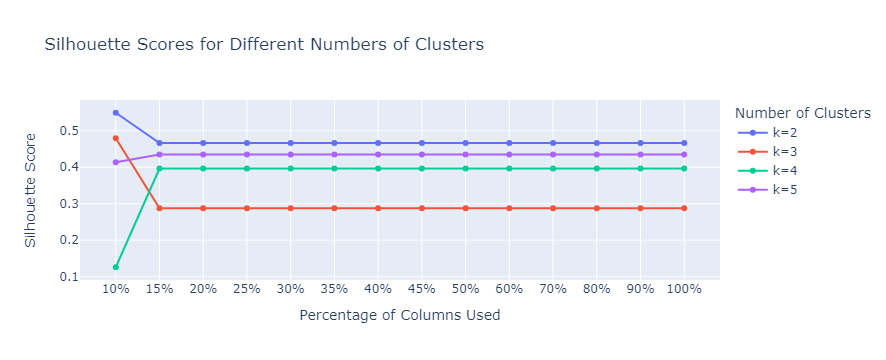

In [44]:
# List of percentages representing parts of the total columns to use for clustering
percentages = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Setup Plotly figure
fig = go.Figure()
# Loop over different values of k for clusters
for k in range(2, 6):  # k varies from 2 to 5
    print("Code is running for Cluster", k)
    cluster_path = f"{output_path}/{k}_Clusters"
    if not os.path.exists(cluster_path):
        os.makedirs(cluster_path)
    silhouette_scores = []
    for p in percentages:
        num_columns = int(len(mad_sorted) * p)
        top_columns = [col[0] for col in mad_sorted[:num_columns]]

        # Directory for the current percentage
        percentage_path = f"{cluster_path}/top_percentage_{int(p * 100)}"
        if not os.path.exists(percentage_path):
            os.makedirs(percentage_path)
        
        # Store top features for current percentage
        features_path = f"{percentage_path}/top_features.txt"
        with open(features_path, 'w') as file:
            for col in top_columns:
                file.write(col + '\n')
        

        #The selected columns are standardized using StandardScaler. This ensures that each feature contributes equally to the distance computations 
        #in the KMeans algorithm, which is crucial because KMeans is sensitive to the scales of the input features.
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data_processed[top_columns])
        #print("Scaled_data : ", scaled_data.shape[1])  # Output the number of features after scaling
        original_indices = data_processed.index  # Capture the original indices before scaling
    
    
        # This step reduces the number of dimensions in the data by transforming it to a new basisvwhere the variance retained is as specified (90% in this case). The goal is to reduce
        # complexity while keeping the most informative aspects of the data.  Apply PCA to reduce dimensionality while retaining 90% of the variance:
        # pca = PCA(n_components=0.90)  # Initialize PCA to retain 90% of the variance
        # data_reduced = pca.fit_transform(scaled_data)
        # print("Reduced to %d dimensions" % data_reduced.shape[1]) 
        
        # Compute silhouette score for the current number of clusters and percentage of columns
        score = kmeans_silhouette_score(scaled_data, k, percentage_path, original_indices, p)
        silhouette_scores.append(score)
    
    # Add the silhouette scores to the plot for the current number of clusters
    fig.add_trace(go.Scatter(
        x=[f"{int(p * 100)}%" for p in percentages],
        y=silhouette_scores,
        mode='lines+markers',
        name=f'k={k}'
    ))

# Update plot layout
fig.update_layout(
    title="Silhouette Scores for Different Numbers of Clusters",
    xaxis_title="Percentage of Columns Used",
    yaxis_title="Silhouette Score",
    legend_title="Number of Clusters"
)

# Show the plot
fig.show()

# Apply Hierarchical clustering

In [57]:
num_columns = int(len(mad_sorted) * 0.10)
top_columns = [col[0] for col in mad_sorted[:num_columns]]

In [58]:
num_columns

293

In [59]:
data_processed[top_columns]

,chr9_62804102_62804181_62804157_62804158_T_C,chr1_16577277_16577356_16577307_16577308_T_C,chr9_62804102_62804181_62804146_62804147_A_G,chr1_229432516_229432595_229432516_229432517_C_G,chr1_6148814_6148893_6148818_6148819_C_G,chr7_154060937_154061016_154060955_154060956_G_C,chr3_48656100_48656179_48656105_48656106_C_G,chr22_11066477_11066556_11066502_11066503_G_A,chr1_144437905_144437984_144437935_144437936_T_C,chr9_129438841_129438920_129438883_129438884_T_A,...,chr19_13954399_13954478_13954440_13954441_A_T,chr20_28582979_28583058_28583020_28583021_G_A,chr15_78733713_78733792_78733726_78733727_A_G,chr13_25577100_25577179_25577134_25577135_G_A,chr2_306444_306523_306505_306506_T_C,chr7_99731019_99731098_99731032_99731033_A_G,chr1_148538609_148538688_148538652_148538653_G_A,chr15_30407235_30407314_30407238_30407239_G_C,chr2_232487679_232487758_232487716_232487717_A_C,chr6_32589603_32589682_32589648_32589649_T_G
Patient_ID,,,,,,,,,,,,,,,,,,,,,
3adc47fa-b27a-4df1-98ab-201ebab3c6bf_CaVEMan,-1,0,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67c83385-8497-4c2d-932e-9a3b9bb90ec9_CaVEMan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c6b9e176-a36b-4eb2-aa15-6a0155c1aeb5_CaVEMan,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d214490c-9f1c-4228-8cbc-7c8238942041_CaVEMan,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4e285b95-27ba-49b9-980a-6dbfc09a62c0_CaVEMan,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b0a32ca7-5793-4f50-97f8-8adf5254a205_CaVEMan,-1,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7bed15a4-3b1e-487e-954d-e6b55e296dc0_CaVEMan,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0218338-6d83-491f-b51d-844d209f54b3_CaVEMan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_processed[top_columns])

In [61]:
scaled_data

array([[-1.35724179, -0.41702883,  0.39380225, ..., -0.06819943,
        -0.06819943,  0.06819943],
       [ 0.7367884 , -0.41702883,  0.39380225, ..., -0.06819943,
        -0.06819943,  0.06819943],
       [-1.35724179, -0.41702883,  0.39380225, ..., -0.06819943,
        -0.06819943,  0.06819943],
       ...,
       [ 0.7367884 ,  2.39791576,  0.39380225, ..., -0.06819943,
        -0.06819943,  0.06819943],
       [ 0.7367884 , -0.41702883,  0.39380225, ..., -0.06819943,
        -0.06819943,  0.06819943],
       [-1.35724179, -0.41702883,  0.39380225, ..., -0.06819943,
        -0.06819943,  0.06819943]])

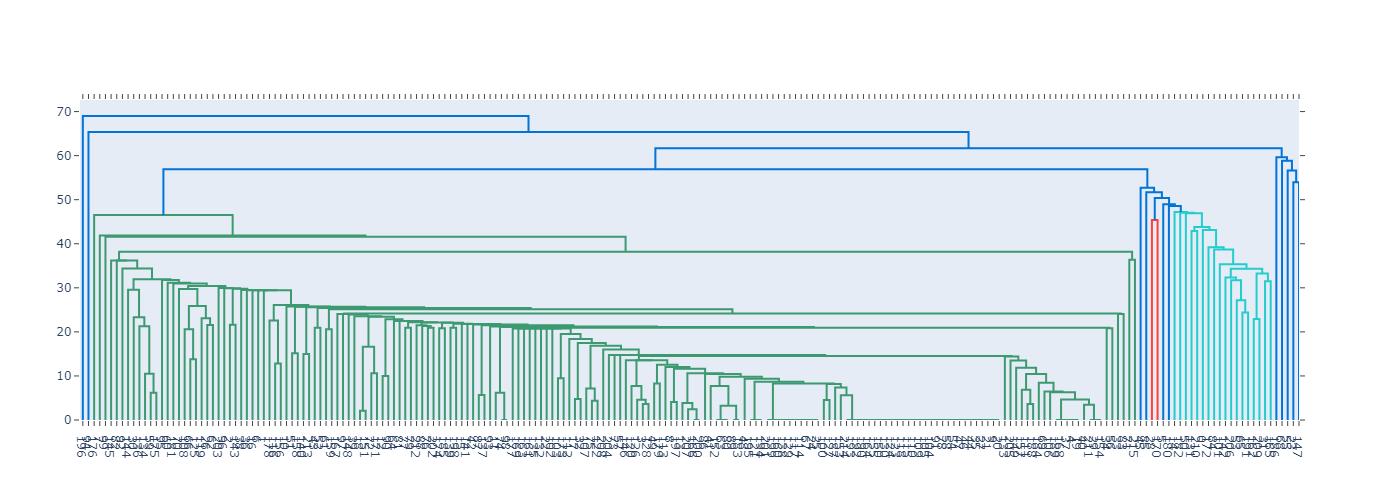

Silhouette Score for k=2: 0.5994097753561954
Silhouette Score for k=3: 0.5814288848736356
Silhouette Score for k=4: 0.5403229042058408
Silhouette Score for k=5: 0.5379518732348821


In [62]:
# Compute the linkage matrix using the Ward method
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
fig = ff.create_dendrogram(scaled_data, linkagefun=lambda x: linked, labels=None)
fig.update_layout(width=1800, height=500)
fig.show()

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = {}
for k in range(2, 6):
    # Use fcluster to flatten the dendrogram to 'k' clusters
    labels = fcluster(linked, k, criterion='maxclust')
    score = silhouette_score(scaled_data, labels)
    silhouette_scores[k] = score
    print(f'Silhouette Score for k={k}: {score}')